<a href="https://colab.research.google.com/github/yajima-yasutoshi/DataMinig/blob/main/20231101/%E5%9F%BA%E7%A4%8E%E9%9B%86%E8%A8%88%E3%81%A8%E5%8F%AF%E8%A6%96%E5%8C%96%E3%81%AE%E6%BC%94%E7%BF%92%E3%81%AE%E8%A7%A3%E7%AD%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データマイニング第6回（2023/11/1）

#本日の講義の目的





前回までの講義内容を復習し、基礎集計と可視化を実施してみる

## 準備

In [8]:
!pip install japanize-matplotlib

In [9]:
# 必要なライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns



---



---



# Booksデータベース

## データの読み込み
* データをダウンロード

    以下のアドレスより、book.csv をPCにダウンロードする。

    https://github.com/yajima-yasutoshi/DataMinig/tree/main/20231101
[リンクテキスト](https://)
* Google Drive のマウントの確認

* データ（ books.csv ）を Google Drive の適当なフォルダーにアップロード

Booksデータベースには、世界各国で

データの説明

項目                  | 説明
--                      | --
 bookID             |  本のID番号
 title              |  本のタイトル
 authors            |  本の著者
 average_rating     |  平均評価
 isbn               |  ISBN番号
 isbn13             |  ISBN番号
 language_code      |  言語
 num_pages          |  ページ数
 ratings_count      |  評価の数
 text_reviews_count |  レビュー文章が記載された数
 publication_date   |  出版日  
 publisher          |  出版社

In [10]:
# データフレームへの読み込み
file_name = '/content/drive/MyDrive/周南公立大学/講義/データマイニング/データ/books.csv'
# 一部に読み込めないレコードがあるので、error_bad_lines=False を指定している
df = pd.read_csv(file_name, error_bad_lines=False)
df.rename(columns={'  num_pages': 'num_pages'}, inplace=True)

<ipython-input-10-11c329d42685>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_name, error_bad_lines=False)
Skipping line 3350: expected 12 fields, saw 13
Skipping line 4704: expected 12 fields, saw 13
Skipping line 5879: expected 12 fields, saw 13
Skipping line 8981: expected 12 fields, saw 13



## データの確認

In [ ]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


データのレコードの数と列の個数を調べる。

In [ ]:
df.shape

(11123, 12)

列の型を調と欠損値の有無を確認する

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


上の結果から、それぞれの項目変数の型、また欠損値が無いことが分かる。

### 型の見分け方

型 | Dtype
-- | --
数値型 | int??, float??,
カテゴリ型 | object


データに登録されている本の平均評価（average_rating）の中央値は何点か。

データに登録されている本のページ数（num_pages）の平均値は何ページか。


## 各項目の調査



*   数値型：最大、最小、平均、中央値など
*   カテゴリ型：カテゴリ数、最頻値など



In [ ]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [ ]:
df.describe(include='object')

,title,authors,isbn,language_code,publication_date,publisher
count,11123,11123,11123,11123,11123,11123
unique,10348,6639,11123,27,3679,2290
top,The Iliad,Stephen King,0439785960,eng,10/1/2005,Vintage
freq,9,40,1,8908,56,318


## データの理解

最も多く本が登録されている著者は誰か

In [ ]:
df['authors'].mode()

0    P.G. Wodehouse
1      Stephen King
Name: authors, dtype: object

In [11]:
df['authors'].value_counts().sort_values(ascending=False).head(4)

Stephen King        40
P.G. Wodehouse      40
Rumiko Takahashi    39
Orson Scott Card    35
Name: authors, dtype: int64

ページ数の分布

<Axes: xlabel='num_pages', ylabel='Count'>

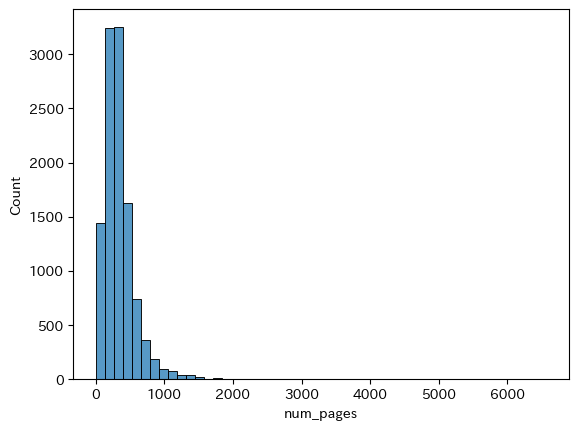

In [ ]:
sns.histplot(df['num_pages'], bins=50)

最もページ数（num_pages）の最も多い本は何か。

In [ ]:
df.sort_values(by = 'num_pages', ascending=False).head(3)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
6497,24520,The Complete Aubrey/Maturin Novels (5 Volumes),Patrick O'Brian,4.70,039306011X,9780393060119,eng,6576,1338,81,10/17/2004,W. W. Norton Company
6802,25587,The Second World War,Winston S. Churchill/John Keegan,4.45,039541685X,9780395416853,eng,4736,1493,99,5/9/1986,Mariner Books
10906,44613,Remembrance of Things Past (Boxed Set),Marcel Proust/C.K. Scott Moncrieff/Frederick A...,4.34,0701125594,9780701125592,eng,3400,6,1,3/5/1981,Chatto & Windus


average_ratings の分布


<Axes: xlabel='average_rating', ylabel='Count'>

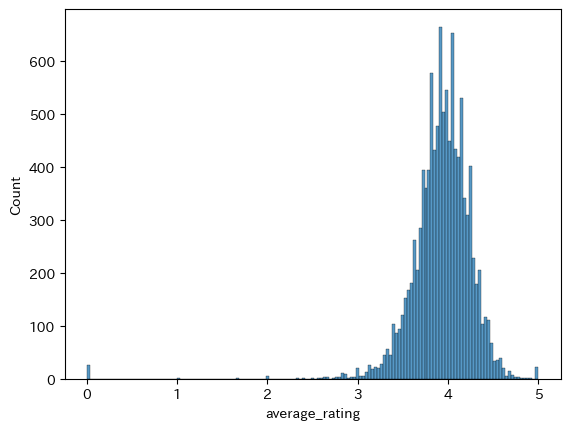

In [ ]:
sns.histplot(df['average_rating']) #, binwidth=0.1)

著者の中で、ページ数（num_pages）の平均が最も多い著者は誰か？

In [ ]:
df.groupby('authors')['num_pages'].mean().sort_values(ascending=False)

authors
Winston S. Churchill/John Keegan                                                     4736.0
Marcel Proust/C.K. Scott Moncrieff/Frederick A. Blossom/Joseph Wood Crutch           3400.0
Dennis L. Kasper/Dan L. Longo/Stephen L. Hauser/Anthony S. Fauci/Eugene Braunwald    2751.0
Anonymous                                                                            2198.0
Laurence L. Brunton/John S. Lazo/Keith  L. Parker                                    2021.0
                                                                                      ...  
Robert B. Parker/Joe Mantegna                                                           0.0
Mary Higgins Clark/Jan Maxwell                                                          0.0
Robert   Harris/Michael Cumpsty                                                         0.0
Dan Brown/Paul Michael                                                                  0.0
J.R.R. Tolkien/Martin Shaw                                              

booksデータベースで、language_code が spa の本は何冊あるか。

In [ ]:
df['language_code'].value_counts()

eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: language_code, dtype: int64

In [ ]:
df[ df['language_code'] == 'spa' ].shape

(218, 12)

出版社 （publisher）の中で、ページ数の平均が最も多い出版社はどれか。

In [ ]:
df.groupby('publisher')['num_pages'].mean().sort_values(ascending=False)
# Group the data by publisher and compute the average number of pages for each publisher
# average_pages_per_publisher = df.groupby('publisher')['num_pages'].mean().reset_index()
# average_pages_per_publisher

publisher
McGraw-Hill Medical Publishing               2751.0
Zondervan Publishing House                   2198.0
Starfire                                     2088.0
Bollingen/Princeton University Press (NJ)    1757.0
Collins Modern Classics                      1600.0
                                              ...  
Audio Renaissance                               0.0
Warner Adult                                    0.0
Fawcett Coventry                                0.0
RH Audio                                        0.0
RH Audio Price-less                             0.0
Name: num_pages, Length: 2290, dtype: float64

出版社（publisher） 毎に ratings_count の合計を計算する。このとき、合計が最も多い publisher はどれか。

In [ ]:
df.groupby('publisher')['ratings_count'].sum().sort_values(ascending=False)

publisher
Penguin Books                10967448
Scholastic Inc.               6617877
Little  Brown and Company     5493803
Penguin Classics              5281321
Vintage                       5001557
                               ...   
Gale Cengage                        0
Live Oak Media                      0
Puzzle-Roca                         0
Rosenberg Publishing                0
Métailié                            0
Name: ratings_count, Length: 2290, dtype: int64

ratings_count の合計の多い出版社 Top5を可視化してみる。

In [ ]:
ratings_count_per_publisher_top5 = df.groupby('publisher')['ratings_count'].sum().sort_values(ascending=False).head(5).reset_index()

In [ ]:
ratings_count_per_publisher_top5

,publisher,ratings_count
0,Penguin Books,10967448
1,Scholastic Inc.,6617877
2,Little Brown and Company,5493803
3,Penguin Classics,5281321
4,Vintage,5001557


Text(0, 0.5, '出版社')

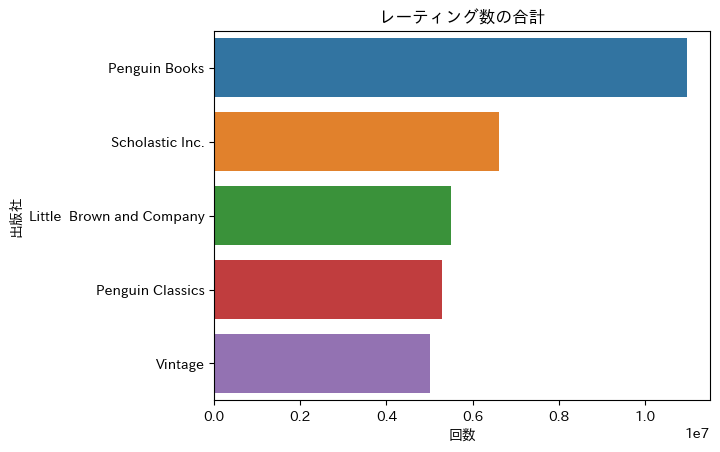

In [ ]:
sns.barplot(x='ratings_count', y='publisher', data=ratings_count_per_publisher_top5)
plt.title('レーティング数の合計')
plt.xlabel('回数')
plt.ylabel('出版社')

language_code が jpn の本に限定した場合、ページ数の平均が最も多い出版社（publisher）はどれか。

In [ ]:
df[ df['language_code'] == 'jpn' ].groupby('publisher')['num_pages'].mean().sort_values(ascending=False)
#df[ df['language_code'] == 'jpn' ].groupby('publisher')['num_pages'].agg(['count', 'mean'])

publisher
集英社                       199.500000
Shueisha                  195.666667
小学館                       191.533333
講談社                       186.833333
ガンガンコミックス                 185.200000
ビブロス                      182.000000
Hakusen Sha               178.000000
小学館 [Shōgakukan]         176.000000
角川書店 (Kadokawa Shoten)    171.500000
Name: num_pages, dtype: float64


---
---

# Titanic データの説明

1912年に起きたTitanic号の沈没事故に関するデータを使い、今までの講義内容を復習する。

今回利用するデータは seaborn パッケージに含まれているサンプルデータである。

In [ ]:
# データの読み込み
df = sns.load_dataset('titanic')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB



今回利用するデータの概要は以下の通り。

項目 | 説明
-- | --
survived | 生存したかどうか（0 = No, 1 = Yes）
pclass   | 乗客のクラス（1 = 1st, 2 = 2nd, 3 = 3rd）
sex      | 性別（male, female）
age      | 年齢
sibsp  | タイタニック号に乗っていた兄弟姉妹/配偶者の数
parch | タイタニック号に乗っていた親/子供の数
fare | 乗船料金
embarked |  乗船した港（C = Cherbourg, Q = Queenstown, S = Southampton）
class | 乗客のクラスを文字列で（'First', 'Second', 'Third'）
who | 乗客のタイプ（'man', 'woman', 'child'）
adult_male |  成人男性かどうか（True, False）
deck |  乗客がいたデッキ（A, B, C, D, E, F, G, NaN）
embark_town |  乗船した町の名前（'Southampton', 'Cherbourg', 'Queenstown', NaN）
alive |  生存したかどうかを文字列で入力（'yes', 'no'）
alone | 一人で乗船したかどうか（True, False）

なお、欠損値: age、embarked などの特定の列に欠損値が存在する。


In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.shape

(891, 15)

In [ ]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# データの前処理
df['age'].fillna(df['age'].median(), inplace=True)  # 'age'列の欠損値を中央値で埋める
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)  # 'embarked'列の欠損値を最頻値で埋める

In [ ]:
# 基礎集計
survival_count = df['survived'].value_counts()  # 生存者と死亡者の数を集計
survival_rate_by_gender = df.groupby('sex')['survived'].mean()  # 性別ごとの生存率を集計

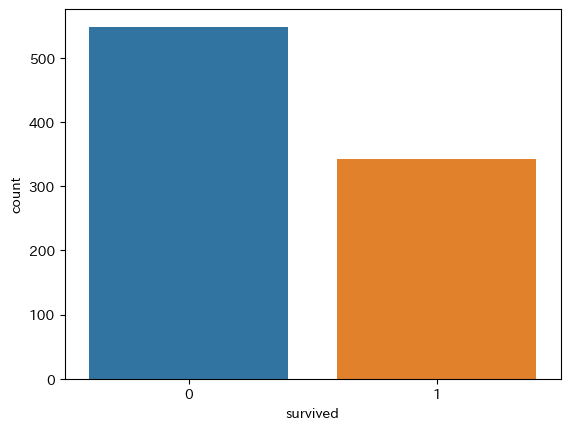

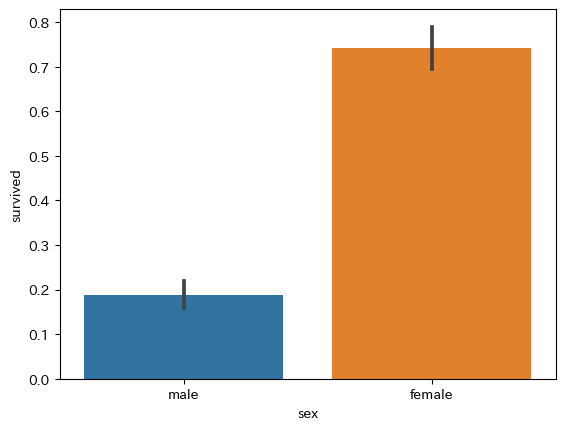

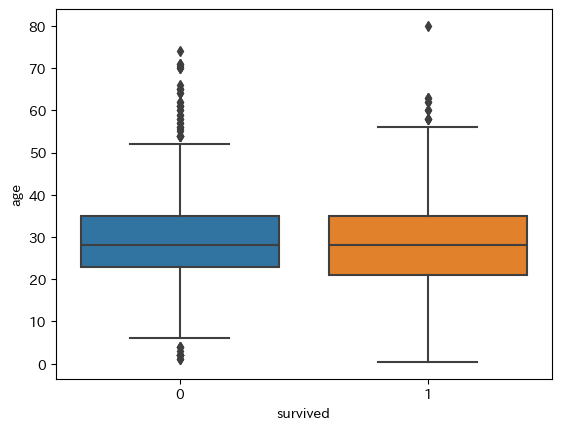

In [ ]:
# データの可視化（Seaborn使用）
sns.countplot(x='survived', data=df)  # 生存者と死亡者の数を棒グラフで表示
plt.show()

sns.barplot(x='sex', y='survived', data=df)  # 性別ごとの生存率を棒グラフで表示
plt.show()

sns.boxplot(x='survived', y='age', data=df)  # 年齢と生存率の関係を箱ひげ図で表示
plt.show()


<Axes: xlabel='survived', ylabel='count'>

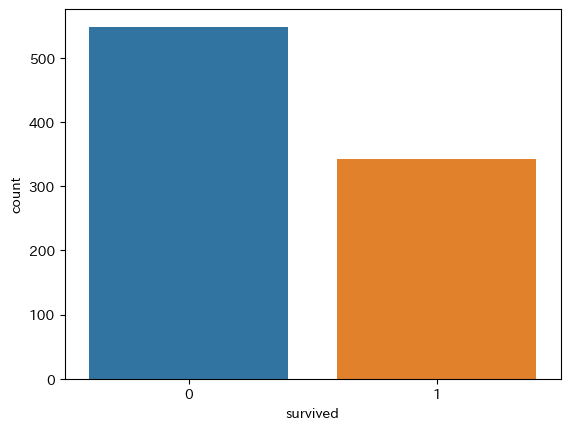

In [ ]:
sns.countplot(x='survived', data=df)  # 生存者と死亡者の数を棒グラフで表示

<Axes: xlabel='survived'>

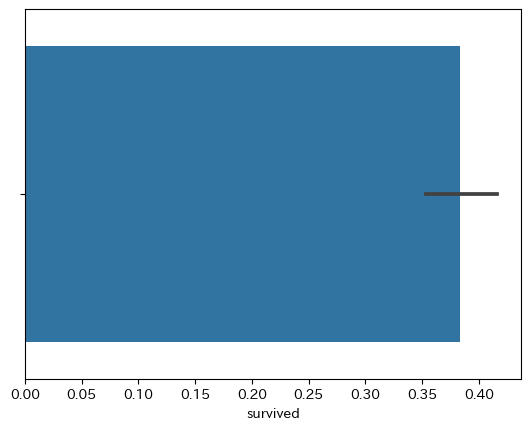

In [ ]:
sns.barplot(x='survived', data=df)